# Python Assignment 3

⏱⏱⏱**Due: 12/01/2024 11:59:59 PM** ⏱⏱⏱

Please submit your notebook files and upload them to your Git repository. Don't forget to include a link to your Git repository when submitting this file on Brightspace.

Total points: 150 (equivalent to 15 points after conversion)

I have provided some guidance in comments to help you through the steps, but feel free to approach this in a different way if you prefer. **Feel free to disregard my comments if you have an alternative approach in mind.**

## 1. Good presentation of your code and outputs; submitting your files to Github (10 pts)

Ensure thorough and clear comments within your code to explain its functionality.

Enhance your plots by adding titles, legends, and axis labels where appropriate to provide clarity.

If necessary, employ LaTex notation to present mathematical explanations within the notebook.

Divide your code into multiple blocks or cells in Jupyter Notebook and provide descriptive explanations for each block to improve readability.

As part of your submission, include the notebook files and upload them to your Git repository. Additionally, remember to provide a link to your Git repository when submitting the files on Brightspace.

Please adhere to the constraint of using only the `numpy`, `scipy`, and `matplotlib` libraries for this assignment, as it is feasible to complete the task without introducing additional libraries or packages.



## 2. Implementing Gradient Descent Algorithm (60 pts)

Given a function $f(x) = \sqrt{x^2+5}$, $x\in \mathbf{R}$.

Fact: This function is L-smooth.
0. Find the gradient of this function and the minimum value of this function analytically.


1. Plot this function over the interval $[-5, 5]$.
2. Perform the Gradient Descent algorithm to find the minimum value of $f$ for $50$ iterations ($T$) with a step size of $1$ ($\alpha$). Use the last digit of your SB ID divided by 5 and then plus 1 as the initial guess (for example, if your ID ends with 9, your initial guess $x_0$ will be $9\div5 + 1= 2.8$).
3. Record the values of $x_k$ at the $k$-th iteration during GD and report $x_T$.
4. Plot the value of $f(x_k)$ v.s. the iteration number $k$.
5. For each of the step sizes 5, 3, 1, and 0.5, perform gradient descent and record the values of $x_k$ in each step $k$. Plot $f(x_{k-1}) - f(x_{k})$ v.s. $k$ for each step size. Your graphs should all be included in a single plot. Examine if $f(x_{k-1}) - f(x_{k})$ (which means that $f(x_k)$ is always decreasing) is alway positive for all $k$.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o1.png)
![o2](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o2.png)
![o3](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o3.png)

Please note that the graphs generated as output may not precisely match the ones I'm providing here. The disparities could be significant, as I'm presenting a general overview of the expected graph. I've adjusted certain parameters/plot information in the graph generation process to prevent disclosing the "answer/solution".&nbsp;


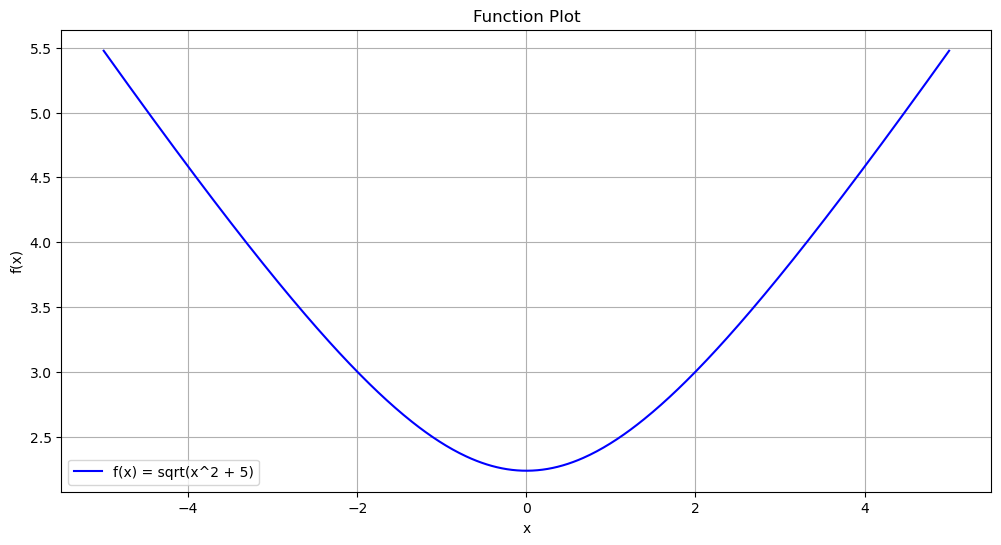

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x).
def f(x):
    return np.sqrt(x**2 + 5)


# Plot the function f(x), np.linspace might be helpful.
x_range = np.linspace(-5, 5, 500)
plt.figure(figsize=(12, 6))
plt.plot(x_range, f(x_range), label="f(x) = sqrt(x^2 + 5)", color="blue")
plt.title("Function Plot")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.legend()
plt.show()



x_T (final value) with step size 1: 1.8728975804847285e-13


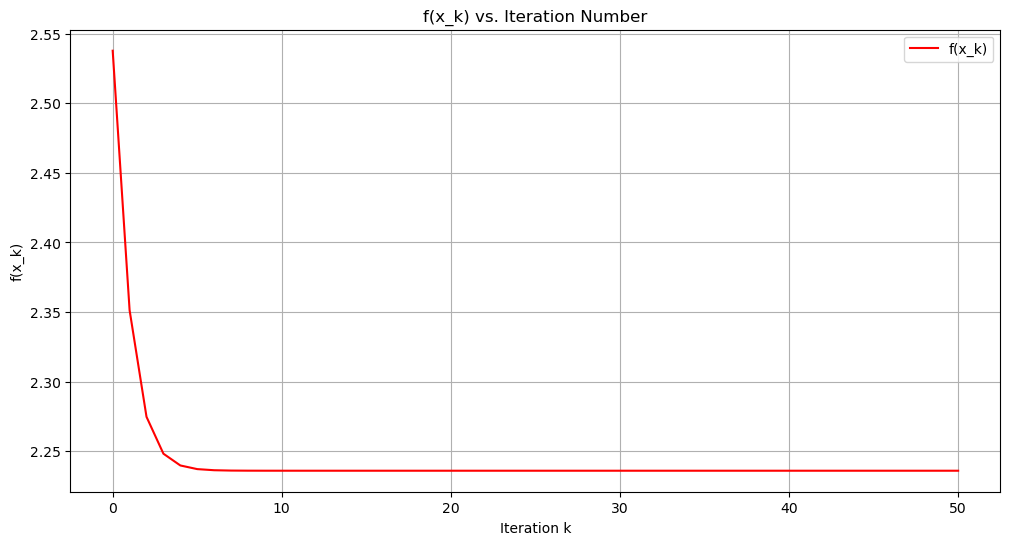

In [18]:
# Define the derivative of the function f(x), for gradient descent

def f_prime(x):
    return x / np.sqrt(x**2 + 5)

# write a function to run the Gradient Descent Algorithm, take input arguments x_0, step_size, and num_iterations; return a list/array of x_k values.
def gradient_descent(x_0, step_size, num_iterations):
    x_vals = [x_0]
    for _ in range(num_iterations):
        x_new = x_vals[-1] - step_size * f_prime(x_vals[-1])
        x_vals.append(x_new)
    return np.array(x_vals)

# set up/assign initial values
last_digit = 1  
x_0 = last_digit / 5 + 1
num_iterations = 50
step_sizes = [5, 3, 1, 0.5]


# Run gradient descent by calling the function
x_vals = gradient_descent(x_0, step_size=1, num_iterations=num_iterations)
f_vals = f(x_vals)


# report x_T by printing out the value
print(f"x_T (final value) with step size 1: {x_vals[-1]}")

# Plot the f(x_k) values vs. iteration number

plt.figure(figsize=(12, 6))
plt.plot(range(len(f_vals)), f_vals, label="f(x_k)", color="red")
plt.title("f(x_k) vs. Iteration Number")
plt.xlabel("Iteration k")
plt.ylabel("f(x_k)")
plt.grid()
plt.legend()
plt.show()


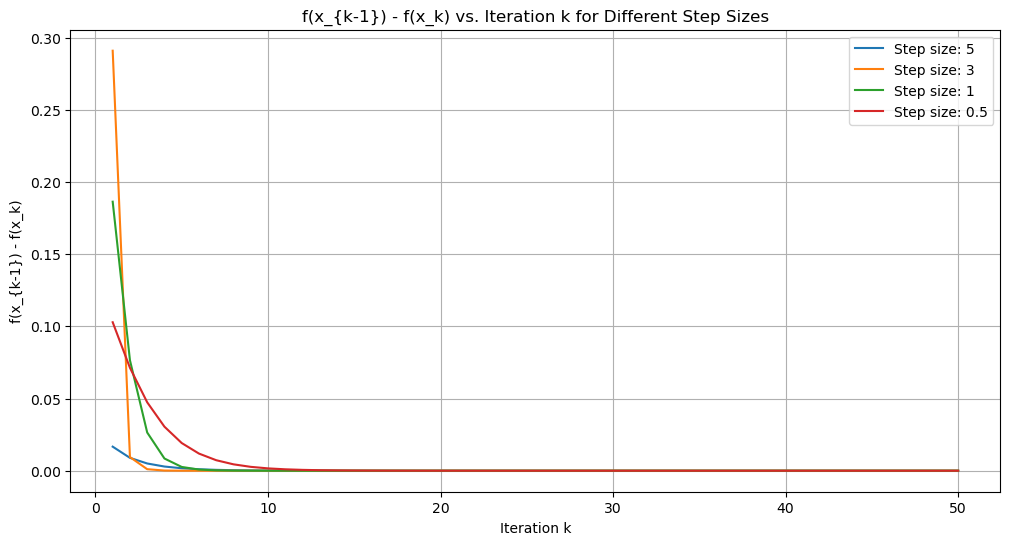

In [20]:
# create a list containing step sizes
step_sizes = [5, 3, 1, 0.5]


# initialize a list to store the results from different step sizes
results = []
num_iterations = 50


# loop through the step sizes and perform GD and record results
for step_size in step_sizes:
    x_vals = gradient_descent(x_0, step_size, num_iterations)
    results.append(x_vals)


# plot multiple curves in a single graph
plt.figure(figsize=(12, 6))

for i, step_size in enumerate(step_sizes):
    x_vals = results[i]
    f_diffs = np.diff(f(x_vals))  # Compute f(x_{k-1}) - f(x_k)
    plt.plot(range(1, len(f_diffs) + 1), -f_diffs, label=f"Step size: {step_size}")

plt.title("f(x_{k-1}) - f(x_k) vs. Iteration k for Different Step Sizes")
plt.xlabel("Iteration k")
plt.ylabel("f(x_{k-1}) - f(x_k)")
plt.grid()
plt.legend()
plt.show()


## 3. Linear Regression with Numpy and Graphing with Matplotlib (30 pts)

In class, we implemented a linear regression model with one-dimensional features ( $x$-values). However, below, you will find the code for generating synthetic data where the features ( $x$-values) are now two-dimensional.

**Change the random seed to be the last two digits of your student ID. For example, if your ID is 123456987, change the random seed to be 87.**

The next step involves performing linear regression on this newly generated data. We will employ the normal equation, a topic covered in class, to determine the coefficients and intercept (weights and bias).

**Report the parameter values and plot the generated data and the regression plane (in 1D, we have a line, but in 2D, we have a plane).** `numpy.linspace`, `numpy.meshgrid`, and [Surface Plot](https://matplotlib.org/stable/gallery/mplot3d/surface3d.html) methods might be helpful in plotting the plane. You don't have to use them, it is just my suggestions.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o4.png)



Intercept: 4.548127384468362
Coefficients: [3.72900077 0.20627143]


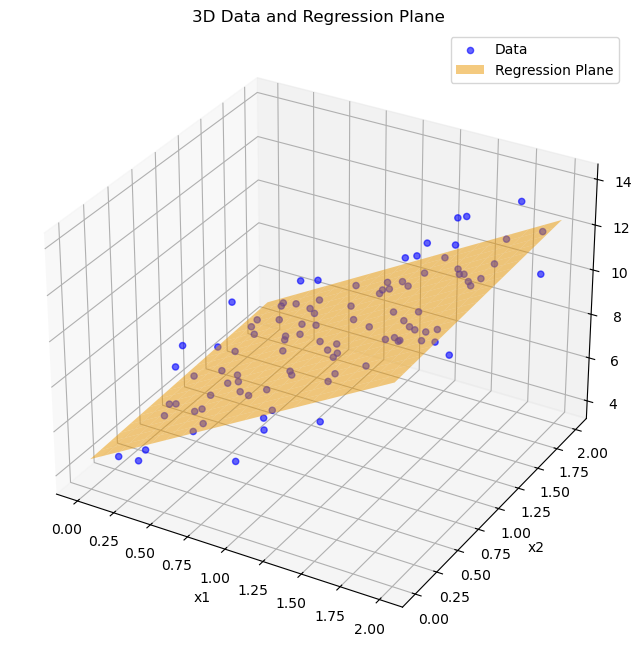

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(11)   # change the seed to be the last two digits of your SB ID. NOTE: I USED THE LAST AND THIRD TO LAST DIGIT BECAUSE 01 DOES NOT WORK.
X = 2 * np.random.rand(100, 2)  # Generate 100 random 2D data points
y = 4 + 4 * X[:, 0] + 0.5 * X[:, 1] + np.random.randn(100)  # Generate y values with noise

# Add a column of ones to X for the bias terms (intercept) in the normal equation

X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Find theta using the normal equation

theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

# Print the intercept and coefficients of the regression plane

intercept = theta[0]
coefficients = theta[1:]
print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")

# Plot the generated data and the regression plane
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, label='Data', color='blue', alpha=0.6)
x1_vals = np.linspace(0, 2, 20)
x2_vals = np.linspace(0, 2, 20)
x1_grid, x2_grid = np.meshgrid(x1_vals, x2_vals)
y_pred_grid = intercept + coefficients[0] * x1_grid + coefficients[1] * x2_grid
ax.plot_surface(x1_grid, x2_grid, y_pred_grid, color='orange', alpha=0.5, label="Regression Plane")
ax.set_title("3D Data and Regression Plane")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
plt.legend()
plt.show()



## 4. Logistic Regression with Numpy and Graphing with Matplotlib (20 pts)

In class, we implemented a logistic regression model to perform binary classification. Here, I provided the exact same code that we discussed in class, but the values for learning_rate and num_epochs are modified. I also removed all the comments. You task is to
1. Tune the Learning Rate and Number of Epochs: Your first task is to fine-tune the values for the learning_rate and num_epochs parameters. Your goal is to identify suitable values that will enable us to converge to a set of parameter values $\theta$ closely approximating the optimal parameter values $\theta^*$.
2. Code Explanation: To enhance code comprehension, please augment the code with meaningful comments. These comments should elucidate the purpose and functionality of each code segment, making it easier for readers to understand the logistic regression implementation.

By accomplishing these tasks, we aim to achieve a better understanding of the logistic regression model's behavior and its parameter optimization process.

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))  # Maps input to the range (0, 1)

# Set random seed for reproducibility
np.random.seed(595)

# Generate random dataset with two features and 100 samples
X = np.random.rand(2, 100)  

w_true = np.array([1.5, -2.5])  # True weights for the underlying model
b_true = 1.0  # True bias

# Generate probabilities using sigmoid function with true weights and bias
probabilities = sigmoid(np.dot(w_true.T, X) + b_true)

# Generate binary labels based on probabilities (threshold at 0.5)
Y = (probabilities > 0.5).astype(int)

# Add noise to the feature data to make the classification task more challenging
X = X + 0.3 * np.random.rand(2, 100) - 0.1 * np.random.rand(2, 100)

# Split data into training (first 80 samples) and test sets (last 20 samples)
X_train, X_test = X[:, :80], X[:, 80:]  
Y_train, Y_test = Y[:80], Y[80:]  

# Initialize weights and bias to zero
w = np.zeros(X.shape[0])  
b = 0.0 

learning_rate = 0.1  # Step size for gradient descent
num_epochs = 1000  # Number of iterations to train

# Loop for gradient descent
for epoch in range(num_epochs):
    # Compute predictions using current weights and bias
    A_train = sigmoid(np.dot(w.T, X_train) + b) 
    
    # Compute gradients of the loss function
    dJdw = np.dot(X_train, (A_train - Y_train).T) / len(Y_train)  # Gradient w.r.t. weights
    dJdb = np.mean(A_train - Y_train)  # Gradient w.r.t. bias
    
    # Update weights and bias using gradients
    w -= learning_rate * dJdw  
    b -= learning_rate * dJdb  

# Make predictions on the training set
A_train = sigmoid(np.dot(w.T, X_train) + b)  # Predicted probabilities
predictions_train = (A_train > 0.5).astype(int)  # Convert probabilities to binary labels

# Make predictions on the test set
A_test = sigmoid(np.dot(w.T, X_test) + b)  # Predicted probabilities
predictions_test = (A_test > 0.5).astype(int)  # Convert probabilities to binary labels

# Compute training and test accuracy
train_accuracy = np.mean(predictions_train == Y_train)  
test_accuracy = np.mean(predictions_test == Y_test)  

# Print results
print(f"Training Set Accuracy: {train_accuracy:.2f}")  # Accuracy on training data
print(f"Test Set Accuracy: {test_accuracy:.2f}")  # Accuracy on test data


Training Set Accuracy: 0.88
Test Set Accuracy: 1.00


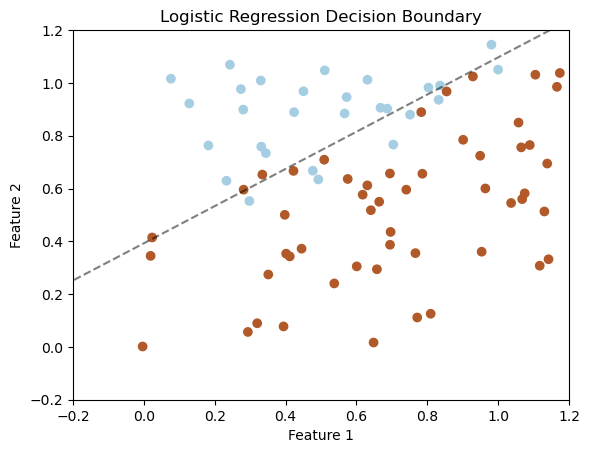

In [82]:
# Scatter plot of the training data points
plt.scatter(X[0, :80], X[1, :80], c=Y[:80], cmap=plt.cm.Paired)  

# Set x and y axis limits for the plot
plt.xlim(-0.2, 1.2)  
plt.ylim(-0.2, 1.2)  
ax = plt.gca()  
xlim = ax.get_xlim()  
ylim = ax.get_ylim()  

# Create a mesh grid for contour plotting
xx, yy = np.meshgrid(
    np.linspace(xlim[0], xlim[1], 50),  # 50 evenly spaced points for x
    np.linspace(ylim[0], ylim[1], 50)   # 50 evenly spaced points for y
)

# Compute the decision boundary values for the grid
Z = np.dot(w.T, np.c_[xx.ravel(), yy.ravel()].T) + b  
Z = sigmoid(Z)  
Z = Z.reshape(xx.shape)  

# Plot the decision boundary (contour where probability = 0.5)
plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.5, linestyles=['--']) 

# Add labels and title to the plot
plt.xlabel('Feature 1') 
plt.ylabel('Feature 2')  
plt.title('Logistic Regression Decision Boundary')  

# Display the plot
plt.show()


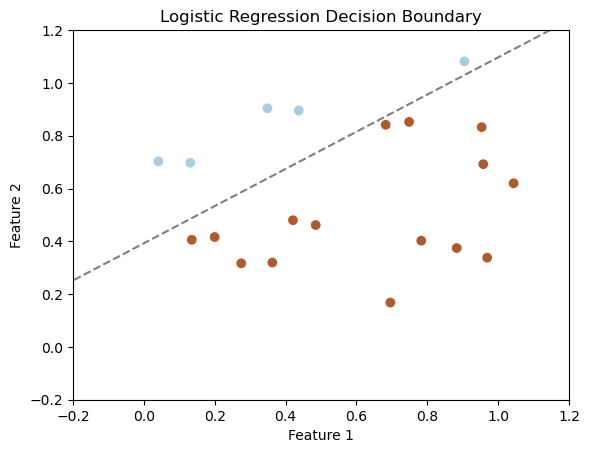

In [84]:
# Scatter plot of the test data points
plt.scatter(X[0, 80:], X[1, 80:], c=Y[80:], cmap=plt.cm.Paired)  

# Set x and y axis limits for the plot
plt.xlim(-0.2, 1.2)  
plt.ylim(-0.2, 1.2)  
ax = plt.gca()  
xlim = ax.get_xlim()  
ylim = ax.get_ylim()  

# Create a mesh grid for contour plotting
xx, yy = np.meshgrid(
    np.linspace(xlim[0], xlim[1], 50),  # 50 evenly spaced points for x
    np.linspace(ylim[0], ylim[1], 50)   # 50 evenly spaced points for y
)

# Compute the decision boundary values for the grid
Z = np.dot(w.T, np.c_[xx.ravel(), yy.ravel()].T) + b  
Z = sigmoid(Z)  
Z = Z.reshape(xx.shape)  

# Plot the decision boundary (contour where probability = 0.5)
plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.5, linestyles=['--'])  # Dashed line for decision boundary

# Add labels and title to the plot
plt.xlabel('Feature 1')  # Label x-axis
plt.ylabel('Feature 2')  # Label y-axis
plt.title('Logistic Regression Decision Boundary')  

# Display the plot
plt.show()  


## 5. Image Binary Classification (30 pts)



For Question 5 of the Python project, please complete it using two distinct Jupyter Notebook scripts. This entails using one notebook for the original dataset and another for the modified dataset. Consequently, you will be submitting a total of three .ipynb files as part of your Python project, ensuring clear separation and organization of your work.

Your tasks:
1. Your first task is to re-implement the classification model that was covered in our class. Please start from scratch and write the code independently. You can refer to the original code provided on Brightspace if you encounter any difficulties, but try to write the code on your own to reinforce your understanding.

2. After implementing the classification model, **report the indices of all the images in the test set for which the model's predictions are incorrect.** To maintain consistency with Python’s convention, please begin your indexing with 0. Additionally, **display the images of 4 of these failed cases for visual examination (you can display more if you like)**. This analysis might help us identify instances where the model is struggling in some applications.

3. Now you will modify the code to treat the dataset differently. The first 160 images plus the last digit of your Student ID will constitute the new training set, while the remaining images in the original training set will be your new test set. There are 209 images in the original training set. For example, if your ID ends with 0, the first 160 images will form your training set, and the remaining 49 images will be part of your test set. The test dataset is discarded and no longer used. Re-train the model using this modified dataset and **report the training and test accuracies**. Additionally, **provide the indices of all the images in the test set for which the model's predictions are incorrect. Display 4 of these misclassified images for further examination.**

By completing these tasks, you'll gain valuable insights into the classification model's performance and its behavior under different training and testing conditions.


  Datasets: [train]: train_catvnoncat.h5, [test]: test_catvnoncat.h5

Epoch 10/50, Loss: 0.7593
Epoch 20/50, Loss: 0.3881
Epoch 30/50, Loss: 0.3303
Epoch 40/50, Loss: 0.0496
Epoch 50/50, Loss: 0.2598
Training Accuracy: 0.83
Test Accuracy: 0.78
Incorrect Test Indices: [5, 13, 18, 19, 28, 29, 30, 34, 38, 44, 45]


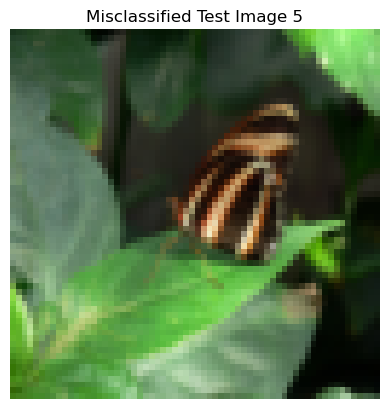

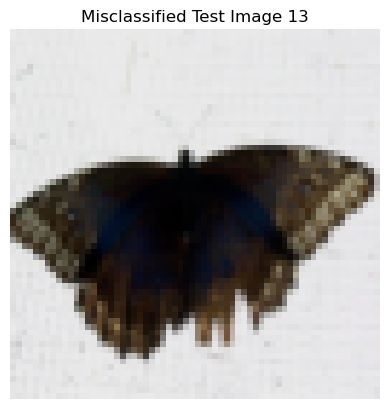

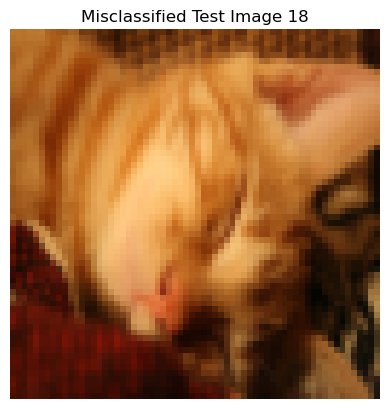

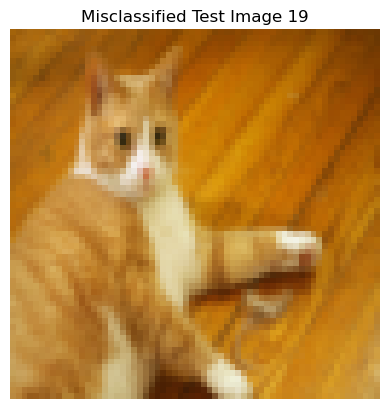

In [74]:
import torch
import torch.nn as nn
import torch.optim as optim
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Load data
def load_dataset(train_path, test_path):
    with h5py.File(train_path, "r") as train_data, h5py.File(test_path, "r") as test_data:
        X_train = np.array(train_data["train_set_x"][:])  # Shape (m_train, height, width, channels)
        Y_train = np.array(train_data["train_set_y"][:])  # Shape (m_train,)
        X_test = np.array(test_data["test_set_x"][:])  # Shape (m_test, height, width, channels)
        Y_test = np.array(test_data["test_set_y"][:])  # Shape (m_test,)

    return X_train, Y_train, X_test, Y_test

# Preprocessing
def preprocess_data(X, Y):
    X = X.reshape(X.shape[0], -1) / 255.0  # Flatten and normalize
    Y = Y.reshape(-1, 1)  # Reshape for compatibility
    return torch.tensor(X, dtype=torch.float32), torch.tensor(Y, dtype=torch.long)

# Define the model
class FeedforwardNN(nn.Module):
    def __init__(self, input_size):
        super(FeedforwardNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 2)  # 2 classes (cat vs non-cat)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Training function
def train_model(model, criterion, optimizer, X_train, Y_train, num_epochs=50, batch_size=32):
    for epoch in range(num_epochs):
        model.train()
        perm = torch.randperm(X_train.size(0))
        for i in range(0, X_train.size(0), batch_size):
            indices = perm[i:i+batch_size]
            batch_X, batch_Y = X_train[indices], Y_train[indices]
            
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_Y.view(-1))
            loss.backward()
            optimizer.step()
        
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item():.4f}")

# Evaluation function
def evaluate_model(model, X, Y):
    model.eval()
    with torch.no_grad():
        outputs = model(X)
        _, predictions = torch.max(outputs, 1)
        accuracy = (predictions == Y.view(-1)).float().mean().item()
        incorrect_indices = torch.where(predictions != Y.view(-1))[0].tolist()
    return accuracy, incorrect_indices

# Load dataset
train_path = "/Users/inijjar/Downloads/train_catvnoncat.h5"
test_path = "/Users/inijjar/Downloads/test_catvnoncat.h5"
X_train, Y_train, X_test, Y_test = load_dataset(train_path, test_path)

# Preprocess dataset
X_train, Y_train = preprocess_data(X_train, Y_train)
X_test, Y_test = preprocess_data(X_test, Y_test)

# Initialize model
input_size = X_train.size(1)
model = FeedforwardNN(input_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train model
train_model(model, criterion, optimizer, X_train, Y_train, num_epochs=50)

# Evaluate model
train_accuracy, train_incorrect = evaluate_model(model, X_train, Y_train)
test_accuracy, test_incorrect = evaluate_model(model, X_test, Y_test)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Incorrect Test Indices: {test_incorrect}")

# Display 4 misclassified images
for i in test_incorrect[:4]:
    # Convert the PyTorch tensor to a NumPy array and scale
    img = X_test[i].detach().cpu().numpy().reshape(64, 64, 3) * 255.0
    plt.imshow(img.astype('uint8'))
    plt.title(f"Misclassified Test Image {i}")
    plt.axis("off")
    plt.show()



Indices of misclassified test images:
[0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 40, 41, 41, 42, 42, 43, 44, 46, 47, 48, 49]


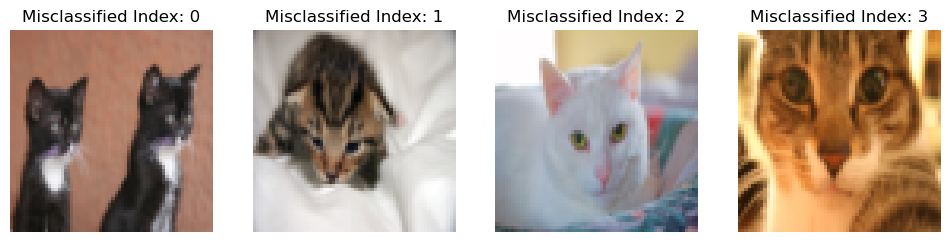

In [72]:
import numpy as np
import torch
import matplotlib.pyplot as plt


# Perform prediction on the test set
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    outputs = model(X_test)
    predictions = (outputs > 0.5).squeeze().int()  # Convert probabilities to binary predictions

# Find misclassified test samples
test_incorrect = torch.where(predictions != Y_test.int())[0].tolist()

print("Indices of misclassified test images:")
print(test_incorrect)

# Visualize 4 of the misclassified images
plt.figure(figsize=(12, 8))

for idx, i in enumerate(test_incorrect[:4]):  # Show only the first 4 misclassified images
    img = X_test[i].detach().cpu().numpy().reshape(64, 64, 3) * 255.0  # Scale back to original range
    plt.subplot(1, 4, idx + 1)
    plt.imshow(img.astype('uint8'))
    plt.title(f"Misclassified Index: {i}")
    plt.axis("off")

plt.show()
